In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


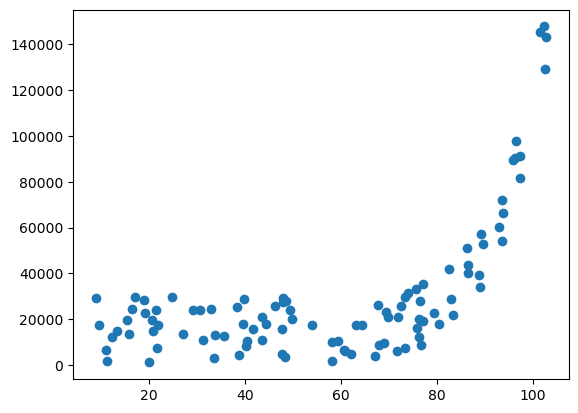

In [3]:
x = data.x
y = data.y
plt.scatter(x, y)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


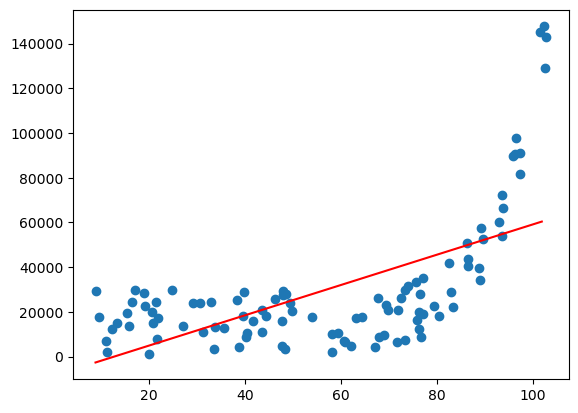

In [4]:
# Мы будем пробовать строить полиномы разных степеней и смотреть, насколько точной получатся такие модели

from sklearn.linear_model import LinearRegression

X = pd.DataFrame(x)
linear = LinearRegression().fit(X, y)

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0)) # генерируем данные для линии регрессии
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [5]:
linear.score(X, y)

0.37467360318911636

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
transformation = PolynomialFeatures(degree=2) # полиномиальную регрессию второго порядка
transformation.fit(X)
X_2 = transformation.transform(X)
X_2.shape
X_2[:5] 

array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
       [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
       [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
       [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
       [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


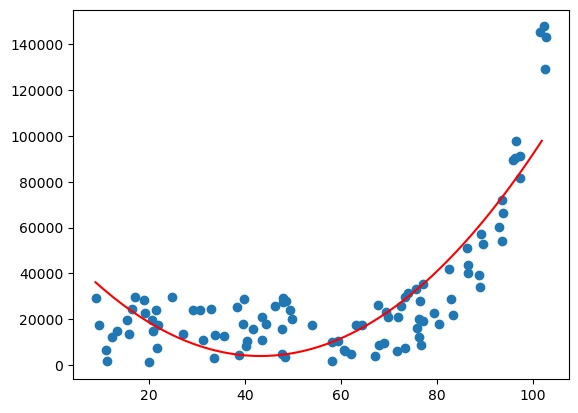

In [8]:
poly_2d = LinearRegression().fit(X_2, y) 

xx_2d = transformation.transform(pd.DataFrame(xx)) 
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [10]:
poly_2d.score(X_2, y) 

0.7359753787024841

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
data.head()

,x1,x2,y
0,0.048289,0.267592,1
1,1.363151,0.171123,0
2,-0.424253,0.893937,0
3,0.112344,0.565672,0
4,-1.262453,0.521735,0


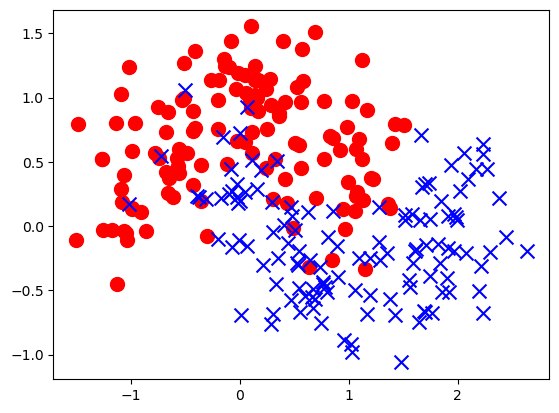

In [13]:
y = data.y
X = data.drop(["y"], axis=1)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [14]:
from sklearn.linear_model import LogisticRegression

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


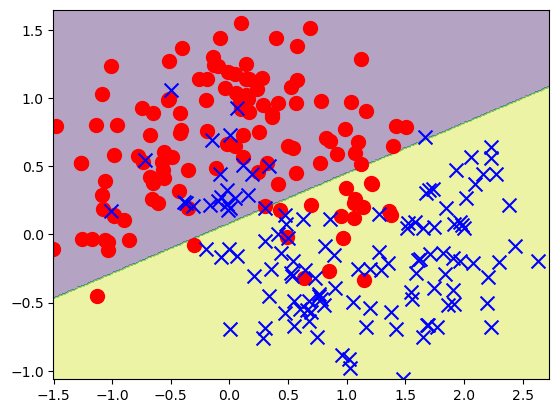

In [15]:
logistic = LogisticRegression().fit(X, y)
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100) # линейная граница принятия решений

In [16]:
logistic.score(X, y)

0.832

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


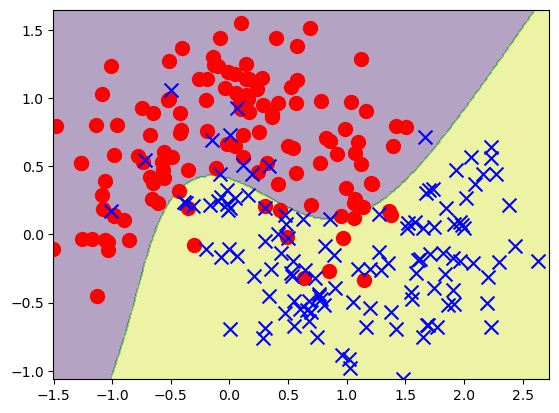

In [17]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

class_3 = LogisticRegression().fit(X_3, y) 
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [18]:
class_3.score(X_3, y) 

0.9

In [19]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [20]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [21]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1) # убираем ненужные и нечисловые столбцы

reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices) # низкая точность

0.6997471890109156

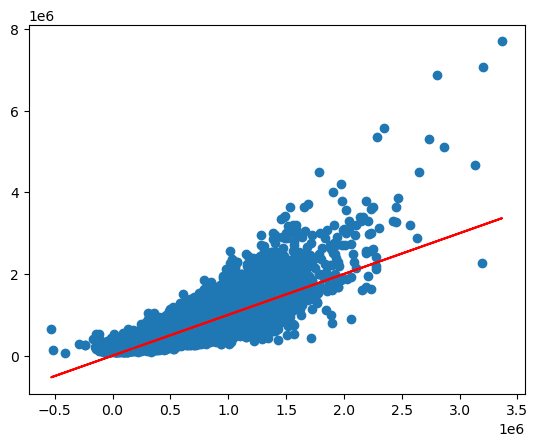

In [22]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [23]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices) # степени3

reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices) # точность сильно возросла

0.864722300120208

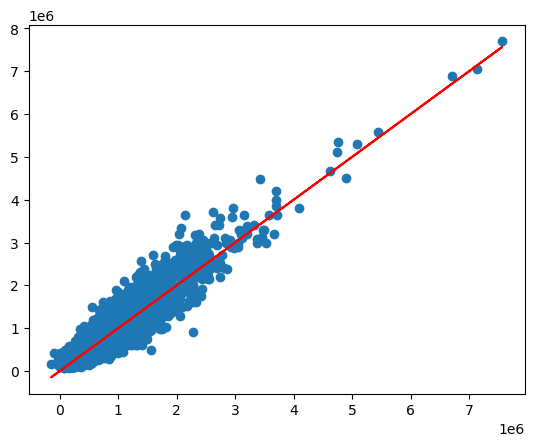

In [24]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r') # отклонения получившейся модели на графике

## дз

1. В выполненной работе добавьте замер времени обучения каждой модели.


In [25]:
import time

In [26]:
linear = LinearRegression()
start = time.time()
linear.fit(X, y)
end = time.time()
print('Linear', end-start)

start = time.time()
transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
X_2 = transformation.transform(X)
model = LinearRegression()
start = time.time()
model.fit(X_2,y)
end = time.time()
print('Poly(2)', end-start)

model = LogisticRegression()
start = time.time()
model.fit(X, y)
end = time.time()
print('Logist', end-start)

class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)
model = LogisticRegression()
start = time.time()
model.fit(X_3, y)
end = time.time()
print('Poly(Log)', end-start)

mod = reg_kc_multiple = LinearRegression()
start = time.time()
mod.fit(X_kc_prices, y_kc_prices)
end = time.time()
print('Real', end-start)

Linear 0.0024929046630859375
Poly(2) 0.0019979476928710938
Logist 0.0019998550415039062
Poly(Log) 0.00099945068359375
Real 0.00850534439086914


2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.


In [27]:
df = pd.read_csv('gen_regression.csv')
x = df.x
x_gen = pd.DataFrame(x)
y_gen = df.y

def analize(n, x, y):
  start = time.time()
  transformation = PolynomialFeatures(degree=n)
  transformation.fit(x)
  x2 = transformation.transform(x)
  model = LinearRegression()
  start = time.time()
  model.fit(x2,y)
  end = time.time()
  return f'Level {n}, R^2={model.score(x2,y)}, Time taken {end-start}'

analize(5, x_gen,y_gen), analize(10,x_gen,y_gen), analize(100,x_gen,y_gen)

('Level 5, R^2=0.9217478060447017, Time taken 0.0',
 'Level 10, R^2=0.923200206258652, Time taken 0.0010035037994384766',
 'Level 100, R^2=0.7915643030729562, Time taken 0.002000093460083008')

3. То же самое проделайте с датасетом для классификации и "King county".


In [28]:
from sklearn.datasets import fetch_openml

data = fetch_openml(name='house_sales', version=4)
data.keys()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [29]:
y = data['target']
X = data['data']
#analize(5, X,y), analize(10,X,y), analize(100,X,y)

5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.


In [34]:
houses_model = LinearRegression().fit(X,y)
X.columns,houses_model.coef_

(Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade',
        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
        'long', 'sqft_living15', 'sqft_lot15', 'date_month', 'date_day'],
       dtype='object'),
 array([-1.89064882e-02,  9.43157458e-02,  1.02058537e-04,  4.57747966e-07,
         1.70876131e-01,  4.55637143e-05,  5.64948226e-05, -3.83374950e-03,
         3.67653452e-05,  1.31520702e+00, -1.14099614e-01,  1.11839139e-04,
        -2.33640462e-07, -4.80791685e-03, -5.88116899e-04]))

6. Попробуйте также проинтерпретировать полиномиальную модель.


In [36]:
transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
x2 = transformation.transform(X)
houses_model_poly = LinearRegression().fit(x2,y)
X.columns,houses_model_poly.coef_

(Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade',
        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
        'long', 'sqft_living15', 'sqft_lot15', 'date_month', 'date_day'],
       dtype='object'),
 array([-2.62112895e-04,  2.09195128e+01, -8.27256302e+00, -2.12140288e-02,
         1.91405927e-04, -2.66751316e+01, -4.59044068e-03, -1.59544127e-03,
         8.31462584e-01,  1.02788606e-02,  1.84434185e+02,  8.07219271e+01,
         5.27828068e-03,  5.47150373e-05,  1.06071777e+00,  4.20905484e-02,
         1.23129600e-03,  1.00400307e-02, -1.65589059e-05, -9.37713454e-08,
         9.32566603e-03, -7.83855122e-06, -5.35204125e-06, -7.30906738e-04,
        -8.78011506e-06, -1.64391488e-03,  1.59601213e-01,  1.42037597e-05,
         7.99656375e-09,  1.87753350e-04,  3.58304366e-05, -1.75193792e-02,
         2.50600800e-05, -2.89863273e-07,  3.89847119e-03,  3.78847607e-05,
        -1.13306876e-05,  3.54421221e-04, -1.76528004e-05,  6.94362344e-02,